<div style="text-align: center;"><div  style="color:#299999; font-size:30px; font-weight:bold; line-height:40px;"> Graduate Rotational Internship Program : June 2021 <br><br>
The Sparks Foundation <br> Data Science & Business Analytics Tasks - 1<br><br> <u> Predicting Student's Score <br>using Supervised ML </u> </div></div><br>
<div style="text-align: right; color:#002222; font-size:30px"><u>Owner: Reema Lad</u></div><br>
<div style="text-align: right; color:#002222; font-size:20px">Wednesday, June 16, 2021</div>

# <span style="color:#01A7E5">Case Study Background</span>
### We need to predict the percentage of an student based on the number of study hours. 

# <span style="color:#01A7E5">Problem Statement</span>
### What will be predicted score if a student studies for 9.25 hrs/ day?

# <span style="color:#01A7E5">Data Dictionary</span>
    Variable                |                Definition
    ------------------------|----------------------------------------------------------------
    Hours                   |   Hours Studied by student
    ------------------------|----------------------------------------------------------------
    Scores                  |   Scores scored by student
    ------------------------|----------------------------------------------------------------

# <span style="color:#01A7E5">**Process**</span>
* Import Libraries
* Load Data
* Reading Raw Data
* Visualization, UniVariate - BiVariate Analysis, EDA
* Model Building
* Predictions

# <font color='blue'><center>Importing Libraries</font>

In [1]:
# Standard
import pandas as pd
import os as os
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# To split data
from sklearn.model_selection import train_test_split

# Models
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Evalution 
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# <font color='blue'><center>Reading Raw File</font>

In [2]:
filepath = r"D:\IMS\GRIP"
filename = "student_scores.csv"

database = pd.read_csv(os.path.join(filepath, filename))

In [3]:
database.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
database.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## <font color='green'><u> Data Insights </font></u>
### * 25 rows with two columns
### * No missing data
### * Target Variable : Score
### * Predictor Variable : Hours

# <font color='blue'><center>Data Visualization</font>

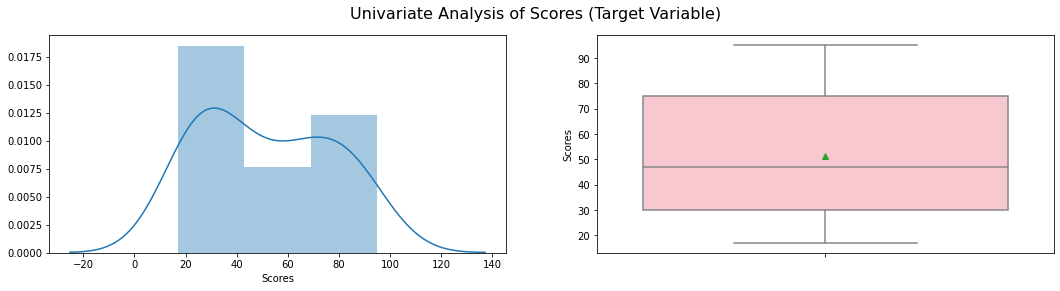

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(18,4))
sns.distplot(database["Scores"], ax=axes[0], kde = True)
sns.boxplot(database["Scores"], ax=axes[1], orient = "v", showmeans = True, color = "pink")
fig.suptitle('Univariate Analysis of Scores (Target Variable)', fontsize=16)
plt.show()

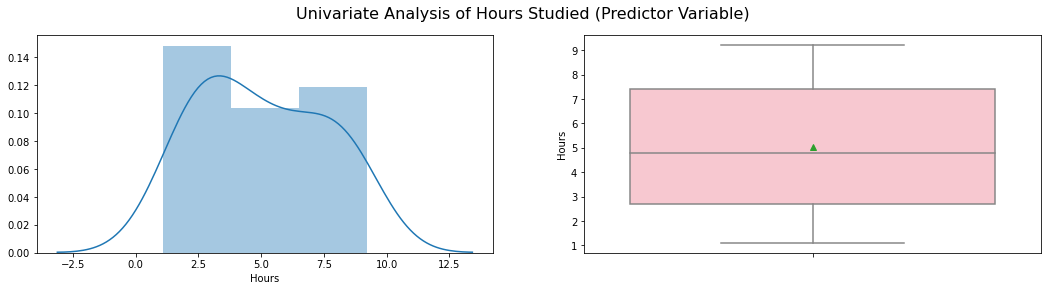

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(18,4))
sns.distplot(database["Hours"], ax=axes[0], kde = True)
sns.boxplot(database["Hours"], ax=axes[1], orient = "v", showmeans = True, color = "pink")
fig.suptitle('Univariate Analysis of Hours Studied (Predictor Variable)', fontsize=16)
plt.show()

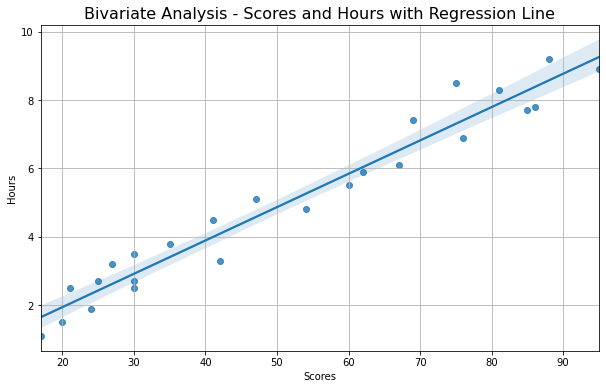

In [8]:
plt.figure(figsize = (10,6))
sns.regplot(x="Scores", y="Hours", data=database)
plt.title("Bivariate Analysis - Scores and Hours with Regression Line", fontsize=16)
plt.grid()
plt.show()

In [9]:
database.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## <font color='green'><u> Variables Insights </font></u>
### * Both Target and Predictor Variables are almost normally distributed with no outliers
### * Hours of studies have a positive corelation with Scores and are highly co-related
### * As a linear relation is reflected, and only single predictor variable is available we will attempt building model using OLS (Ordinary Least Squared method) instead of standard LinearRegression

# <font color='blue'><center>Model - OLS (Ordinary Least Squares regression) (Using Stats Model)</font>

## <font color='darkblue'><u> Train Test Split </font></u>

In [10]:
X = database["Hours"] # Predector Variable
y = database["Scores"] # Target Variable

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=23) # 50 - 50 Split

In [12]:
X_train.shape, y_train.shape

((12,), (12,))

In [13]:
X_test.shape, y_test.shape

((13,), (13,))

## <font color='green'><u> Insights - Train Test Split </font></u>
### * As data is very less, spliting Train Test into 50-50 to guage performance by pushing more data in Test set 

## <font color='darkblue'><u> Building Model </font></u>

In [14]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [15]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    2.777258
Hours    9.785335
dtype: float64

In [16]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     145.9
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           2.75e-07
Time:                        11:48:59   Log-Likelihood:                -36.515
No. Observations:                  12   AIC:                             77.03
Df Residuals:                      10   BIC:                             78.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7773      5.080      0.547      0.597      -8.543      14.097
Hours          9.7853      0.810     12.078      0.000       7.980      11.591
==============================================================================
Omnibus:                        6.908   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                1.484
Skew:                           0.138   Prob(JB):                        0.476
Kurtosis:                       1.299   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='green'><u> Model Insights </font></u>
### * R-Squared Value is 0.95 i.e. 95% of Score variance can be explained by Hours  
### * Prob (F-statistic) has a very low p-value, almost 0, so the model fit is statistacially significant

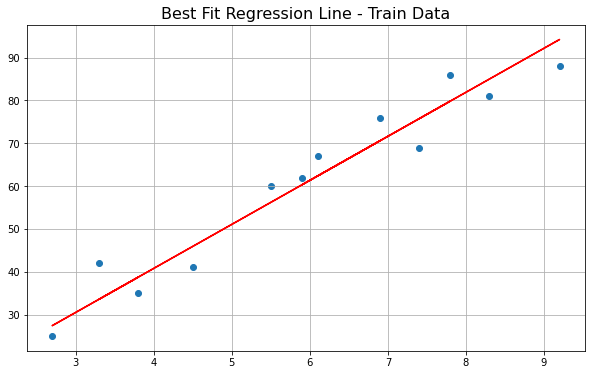

In [17]:
# Visualizing the regression line
plt.figure(figsize = (10,6))
plt.scatter(X_train, y_train)
plt.plot(X_train, -0.337982 + 10.280856 * X_train, 'r')
plt.title("Best Fit Regression Line - Train Data", fontsize=16)
plt.grid()
plt.show()

## <font color='darkblue'><u> Residual Analysis </font></u>

In [18]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

<Figure size 432x288 with 0 Axes>

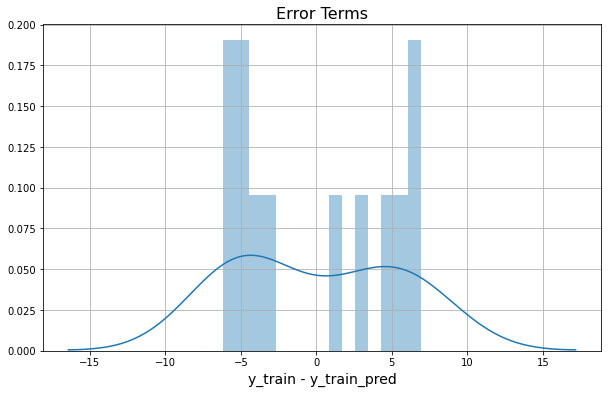

In [19]:
# Plotting the histogram using the residual values
fig = plt.figure()
plt.figure(figsize = (10,6))
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 16)
plt.xlabel('y_train - y_train_pred', fontsize = 14)
plt.grid()
plt.show()

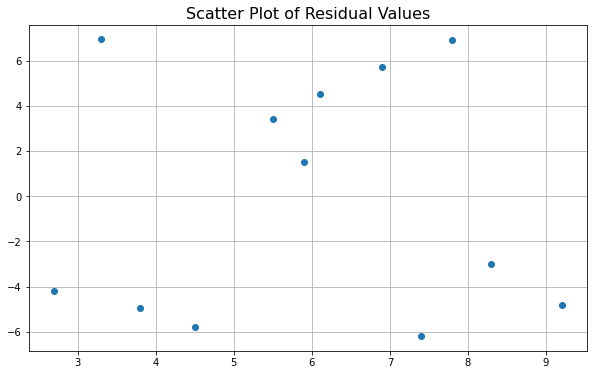

In [20]:
# Looking for any patterns in the residuals
plt.figure(figsize = (10,6))
plt.scatter(X_train,res)
plt.title("Scatter Plot of Residual Values", fontsize = 16)
plt.grid()
plt.show()

## <font color='green'><u> Insights </font></u>
### * Residuals are following an almost Normal Distribution  
### * Residuals do not follow any specific pattern

## <font color='darkblue'><u> Model Evaluation </font></u>

In [21]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

17    21.369394
16    27.240595
15    89.866738
3     85.952604
14    13.541126
20    29.197662
21    49.746865
4     37.025930
0     27.240595
10    78.124336
5     17.455260
2     34.090329
1     52.682465
dtype: float64

In [22]:
# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9506960360629003

## <font color='green'><u> Model Insights </font></u>
### * RSquare Value on Train Data is 93.6%  
### * RSquared Value on Test Data is 95.06%
### * The model is stable and can generalize on unseen test set

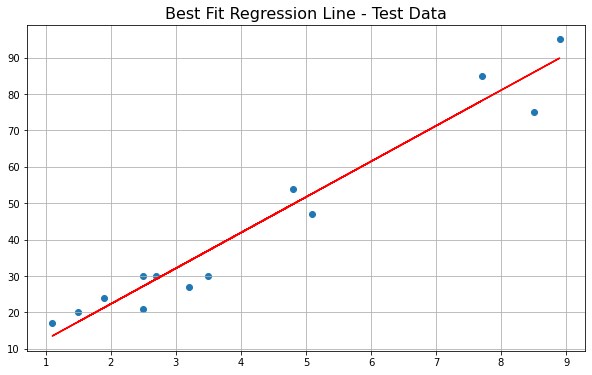

In [23]:
# Visualizing the regression line
plt.figure(figsize = (10,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.title("Best Fit Regression Line - Test Data", fontsize=16)
plt.grid()
plt.show()

## <font color='darkblue'><u> User Defined Input Prediction </font></u>

In [27]:
# Prompting user for input
User_Input = float(input("Input Hours of studies per day to predict Score : "))
print("You have selected : ", User_Input, " hours of studies per day")

# Adding user defined value
X_test_own = []
X_test_own.insert(0, 1.0)
X_test_own.insert(1, User_Input)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_own)

# Printing the predicted values for user defined predictor
print("Predicted Score for: ", X_test_own[1], " hours of study per day, is: ", y_test_pred, "%")

Input Hours of studies per day to predict Score : 9.25
You have selected :  9.25  hours of studies per day
Predicted Score for:  9.25  hours of study per day, is:  [93.29160468] %


# <span style="color:#E0846B"><u>Problem Statement</u></span>
### What will be predicted score if a student studies for 9.25 hrs/ day?

# <span style="color:#7ba960"><u>Prediction</u></span>
### Predicted score is 93.29% if a student studies for 9.25 hrs/ day